In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

In [33]:
df = pd.read_csv('StudentsPerformance.csv')

# Basic EDA

In [10]:
df.head() # Quick look at what the data is like

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.info() # Look at how our data is structured

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Just making life easier
df.columns = df.columns.str.replace(" ", "_")

In [12]:
df.shape # How many rows do we have? 1000 tells us we're unlikely to have NaN

(1000, 8)

In [29]:
df.isnull().sum() # This confirms this

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df.describe() # What do our summary statistics look like? Do any of them look strange? Are there any outliers?
# Is there any missing data that's not a NaN?

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


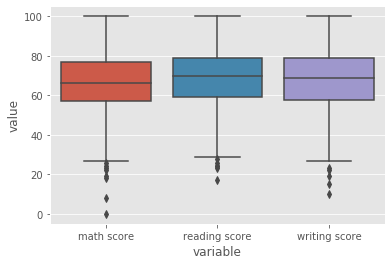

In [28]:
bx = sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df[['math_score', 'reading_score', 'writing_score']]))

# Another look for any outliers - 0 for math might be worth looking at quickly

In [30]:
df['math_score'].value_counts() 
# One student scoring 0 sounds reasonable (maybe they were sick?)
# I'll delete this as this is probably the result of unusual circumstances 
# and won't help with understanding underlying trends

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

In [31]:
df = df[df['math_score'] != 0]

In [35]:
df[df['math_score'] != 0].describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.155155,69.221221,68.112112
std,15.025594,14.513766,15.091685
min,8.000000,23.000000,15.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [34]:
x = df[df['math_score'] == 0]
print(x)

    gender race/ethnicity parental level of education         lunch  \
59  female        group C            some high school  free/reduced   

   test preparation course  math score  reading score  writing score  
59                    none           0             17             10  


In [32]:
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.155155,69.221221,68.112112
std,15.025594,14.513766,15.091685
min,8.000000,23.000000,15.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


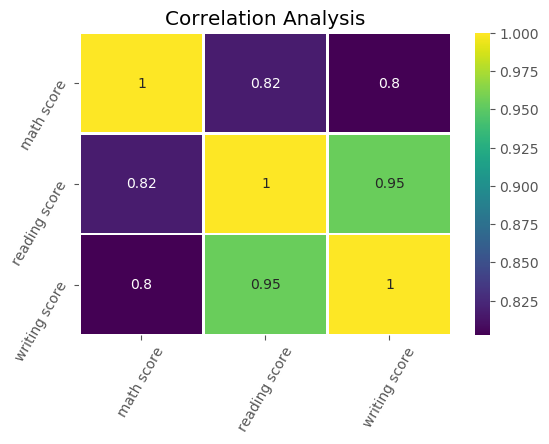

In [20]:
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(),annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

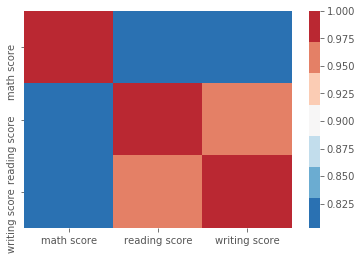

In [38]:
cmap = sns.color_palette("RdBu_r", 7)
sns.heatmap(df.corr(), cmap = cmap)